# Neural Network Fundamentals

## Gradient Descent Introduction:
https://www.youtube.com/watch?v=IxBYhjS295w

In [1]:
from IPython.display import YouTubeVideo
YouTubeVideo("IxBYhjS295w")

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

np.random.seed(1)

%matplotlib inline
np.random.seed(1)

In [3]:
N = 100
x = np.random.rand(N,1)*5
# Let the following command be the true function
y = 2.3 + 5.1*x
# Get some noisy observations
y_obs = y + 2*np.random.randn(N,1)

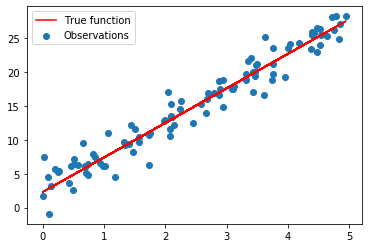

In [4]:
plt.scatter(x,y_obs,label='Observations')
plt.plot(x,y,c='r',label='True function')
plt.legend()
plt.show()

## Gradient Descent

We are trying to minimise $\sum \xi_i^2$.

\begin{align}
\mathcal{L} & = \frac{1}{N}\sum_{i=1}^N (y_i-f(x_i,w,b))^2 \\
\frac{\delta\mathcal{L}}{\delta w} & = -\frac{1}{N}\sum_{i=1}^N 2(y_i-f(x_i,w,b))\frac{\delta f(x_i,w,b)}{\delta w} \\ 
& = -\frac{1}{N}\sum_{i=1}^N 2\xi_i\frac{\delta f(x_i,w,b)}{\delta w}
\end{align}
where $\xi_i$ is the error term $y_i-f(x_i,w,b)$ and 
$$
\frac{\delta f(x_i,w,b)}{\delta w} = x_i
$$

Similar expression can be found for $\frac{\delta\mathcal{L}}{\delta b}$ (exercise).

Finally the weights can be updated as $w_{new} = w_{current} - \gamma \frac{\delta\mathcal{L}}{\delta w}$ where $\gamma$ is a learning rate between 0 and 1.

In [5]:
# Helper functions
def f(w,b):
    return w*x+b

def loss_function(e):
    L = np.sum(np.square(e))/N
    return L

def dL_dw(e,w,b):
    return -2*np.sum(e*df_dw(w,b))/N

def df_dw(w,b):
    return x

def dL_db(e,w,b):
    return -2*np.sum(e*df_db(w,b))/N

def df_db(w,b):
    return np.ones(x.shape)

In [6]:
# The Actual Gradient Descent
def gradient_descent(iter=100,gamma=0.1):
    # get starting conditions
    w = 10*np.random.randn()
    b = 10*np.random.randn()
    
    params = []
    loss = np.zeros((iter,1))
    for i in range(iter):
#         from IPython.core.debugger import Tracer; Tracer()()
        params.append([w,b])
        e = y_obs - f(w,b) # Really important that you use y_obs and not y (you do not have access to true y)
        loss[i] = loss_function(e)

        #update parameters
        w_new = w - gamma*dL_dw(e,w,b)
        b_new = b - gamma*dL_db(e,w,b)
        w = w_new
        b = b_new
        
    return params, loss
        
params, loss = gradient_descent()

In [7]:
iter=100
gamma = 0.1
w = 10*np.random.randn()
b = 10*np.random.randn()

params = []
loss = np.zeros((iter,1))
for i in range(iter):
#         from IPython.core.debugger import Tracer; Tracer()()
    params.append([w,b])
    e = y_obs - f(w,b) # Really important that you use y_obs and not y (you do not have access to true y)
    loss[i] = loss_function(e)

    #update parameters
    w_new = w - gamma*dL_dw(e,w,b)
    b_new = b - gamma*dL_db(e,w,b)
    w = w_new
    b = b_new

In [8]:
dL_dw(e,w,b)

0.007829640537794828

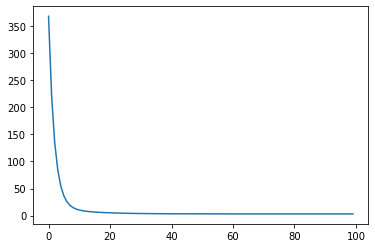

In [9]:
plt.plot(loss)

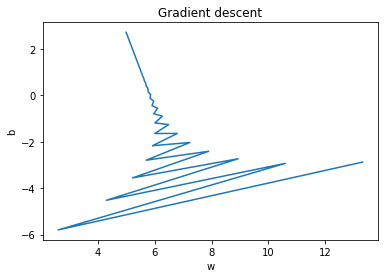

In [10]:
params = np.array(params)
plt.plot(params[:,0],params[:,1])
plt.title('Gradient descent')
plt.xlabel('w')
plt.ylabel('b')
plt.show()

In [11]:
params[-1]

array([4.98991104, 2.72258102])

## Multivariate case

We are trying to minimise $\sum \xi_i^2$. This time $ f = Xw$ where $w$ is Dx1 and $X$ is NxD.

\begin{align}
\mathcal{L} & = \frac{1}{N} (y-Xw)^T(y-Xw) \\
\frac{\delta\mathcal{L}}{\delta w} & = -\frac{1}{N} 2\left(\frac{\delta f(X,w)}{\delta w}\right)^T(y-Xw) \\ 
& = -\frac{2}{N} \left(\frac{\delta f(X,w)}{\delta w}\right)^T\xi
\end{align}
where $\xi_i$ is the error term $y_i-f(X,w)$ and 
$$
\frac{\delta f(X,w)}{\delta w} = X
$$

Finally the weights can be updated as $w_{new} = w_{current} - \gamma \frac{\delta\mathcal{L}}{\delta w}$ where $\gamma$ is a learning rate between 0 and 1.

In [12]:
N = 1000
D = 5
X = 5*np.random.randn(N,D)
w = np.random.randn(D,1)
y = X.dot(w)
y_obs = y + np.random.randn(N,1)

In [13]:
w

array([[ 0.93774813],
       [-2.62540124],
       [ 0.74616483],
       [ 0.67411002],
       [ 1.0142675 ]])

In [14]:
X.shape

(1000, 5)

In [15]:
w.shape

(5, 1)

In [16]:
(X*w.T).shape

(1000, 5)

In [17]:
# Helper functions
def f(w):
    return X.dot(w)

def loss_function(e):
    L = e.T.dot(e)/N
    return L

def dL_dw(e,w):
    return -2*X.T.dot(e)/N 

In [18]:
def gradient_descent(iter=100,gamma=1e-3):
    # get starting conditions
    w = np.random.randn(D,1)
    params = []
    loss = np.zeros((iter,1))
    for i in range(iter):
        params.append(w)
        e = y_obs - f(w) # Really important that you use y_obs and not y (you do not have access to true y)
        loss[i] = loss_function(e)

        #update parameters
        w = w - gamma*dL_dw(e,w)
        
    return params, loss
        
params, loss = gradient_descent()

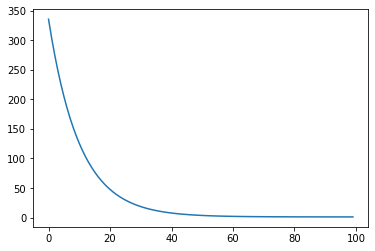

In [19]:
plt.plot(loss)

In [20]:
params[-1]

array([[ 0.94792987],
       [-2.60989696],
       [ 0.72929842],
       [ 0.65272494],
       [ 1.01038855]])

In [21]:
model = LinearRegression(fit_intercept=False)
model.fit(X,y)
model.coef_.T

array([[ 0.93774813],
       [-2.62540124],
       [ 0.74616483],
       [ 0.67411002],
       [ 1.0142675 ]])

In [22]:
# compare parameters side by side
np.hstack([params[-1],model.coef_.T])

array([[ 0.94792987,  0.93774813],
       [-2.60989696, -2.62540124],
       [ 0.72929842,  0.74616483],
       [ 0.65272494,  0.67411002],
       [ 1.01038855,  1.0142675 ]])

## Stochastic Gradient Descent

In [23]:
def dL_dw(X,e,w):
    return -2*X.T.dot(e)/len(X)

def gradient_descent(gamma=1e-3, n_epochs=100, batch_size=20, decay=0.9):
    epoch_run = int(len(X)/batch_size)
    
    # get starting conditions
    w = np.random.randn(D,1)
    params = []
    loss = np.zeros((n_epochs,1))
    for i in range(n_epochs):
        params.append(w)
        
        for j in range(epoch_run):
            idx = np.random.choice(len(X),batch_size,replace=False)
            e = y_obs[idx] - X[idx].dot(w) # Really important that you use y_obs and not y (you do not have access to true y)
            #update parameters
            w = w - gamma*dL_dw(X[idx],e,w)
        loss[i] = e.T.dot(e)/len(e)    
        gamma = gamma*decay #decay the learning parameter
        
    return params, loss
        
params, loss = gradient_descent()

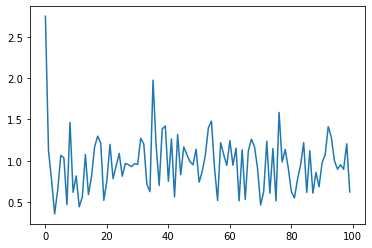

In [24]:
plt.plot(loss)

In [25]:
np.hstack([params[-1],model.coef_.T])

array([[ 0.94494132,  0.93774813],
       [-2.6276984 , -2.62540124],
       [ 0.74654537,  0.74616483],
       [ 0.66766209,  0.67411002],
       [ 1.00760747,  1.0142675 ]])